In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
import time

In [10]:
deg = pd.read_csv("proj4/deg.csv")
del deg["Unnamed: 0"]

In [19]:
deg2 = deg.drop("Undergraduate.Major", axis= 1)

In [75]:
deg2.head()

,Starting.Median.Salary,Mid.Career.Median.Salary
0,46000,77100
1,57700,101000
2,42600,71900
3,36800,61500
4,41600,76800


In [74]:
deg2 =deg2.drop("Percent.change.from.Starting.to.Mid.Career.Salary", axis = 1)

In [ ]:
deg3 = preprocessing.normalize(deg, norm='l2')

In [173]:
dbscan = DBSCAN(eps = 0.05, min_samples = 5)

In [174]:
dbscan

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

In [193]:
start = time.clock()
dbscan.fit(deg3)
print(time.clock() - start)

0.0074892777188426615


In [176]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0], dtype=int64)

D:\Anaconda3.6\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


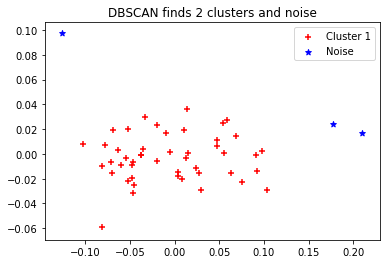

In [177]:
pca = PCA(n_components=2).fit(deg3)
pca_2d = pca.transform(deg3)
c1,c2,c3 = 0,0,0
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

In [184]:
pca_2d

array([[-0.02009314, -0.00553964],
       [ 0.09176364, -0.01344957],
       [-0.05177524,  0.01992601],
       [-0.06936723,  0.01959829],
       [ 0.04694537,  0.01141003],
       [-0.04723964, -0.01971783],
       [-0.03745099, -0.00087972],
       [-0.03713535, -0.00098546],
       [ 0.04704969,  0.00608457],
       [ 0.00408679, -0.01489668],
       [ 0.09789281,  0.00225483],
       [-0.04635009, -0.00614568],
       [ 0.10364604, -0.02916146],
       [ 0.07582998, -0.02236099],
       [ 0.01036266,  0.01945606],
       [ 0.00431036, -0.01748481],
       [-0.12647717,  0.09746421],
       [-0.06971896, -0.01518864],
       [-0.00468968,  0.00137214],
       [ 0.09134636, -0.00101199],
       [-0.04819702, -0.00934301],
       [-0.04665933, -0.03183738],
       [-0.07832396,  0.00681387],
       [ 0.0542624 ,  0.0248362 ],
       [-0.00916281,  0.01700113],
       [-0.02003636,  0.02369392],
       [ 0.01466275,  0.00095853],
       [ 0.06256581, -0.01579042],
       [-0.06036096,

In [185]:
print(pca_2d.shape[0])
for i in range(0, pca_2d.shape[0]):
    if pca_2d[i, 0] > 0.15:
        print(pca_2d[i, :])

50
[ 0.1769737   0.02424592]
[ 0.20964342  0.01685652]


In [188]:
pca_2d[43,:]

array([ 0.20964342,  0.01685652])

In [171]:
mu = np.mean(deg3, axis=0)
nComp = 2
Xhat = np.dot(pca.transform(deg3)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu
print(Xhat[0,])

[  2.04231884e-01   3.52948217e-01   3.55580916e-04   1.96013841e-01
   2.58060354e-01   4.92458658e-01   6.94667328e-01]


D:\Anaconda3.6\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


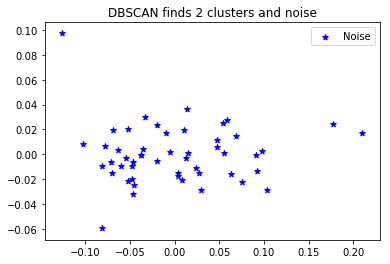

D:\Anaconda3.6\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


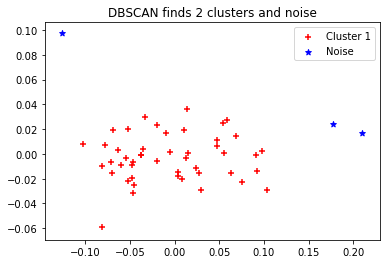

D:\Anaconda3.6\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


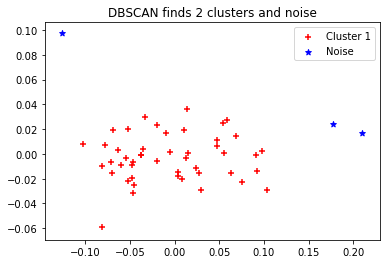

D:\Anaconda3.6\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


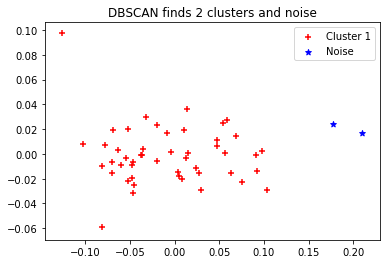

D:\Anaconda3.6\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


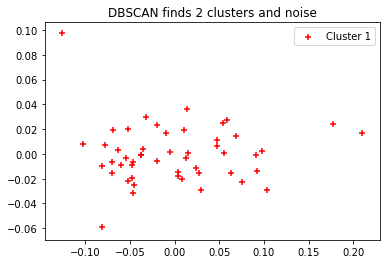

D:\Anaconda3.6\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


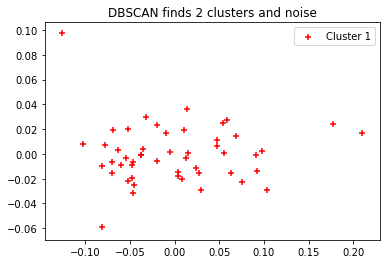

D:\Anaconda3.6\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


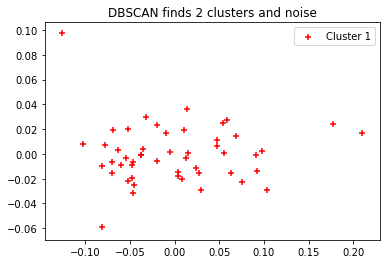

D:\Anaconda3.6\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support 0 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


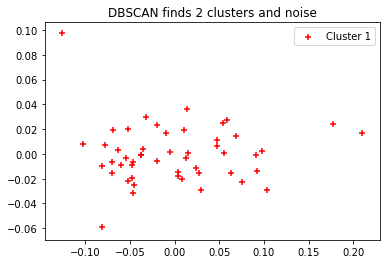

In [172]:
x = [0.01, 0.05, 0.08, 0.1, 0.3, 0.5, 0.8, 1]
for i in x:
    dbscan = DBSCAN(eps = i, min_samples = 5)
    dbscan.fit(deg3)
    pca = PCA(n_components=2).fit(deg3)
    pca_2d = pca.transform(deg3)
    c1,c2,c3 = 0,0,0
    for i in range(0, pca_2d.shape[0]):
        if dbscan.labels_[i] == 0:
            c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
        elif dbscan.labels_[i] == 1:
            c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
        elif dbscan.labels_[i] == -1:
            c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
    plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
    plt.title('DBSCAN finds 2 clusters and noise')
    plt.show()

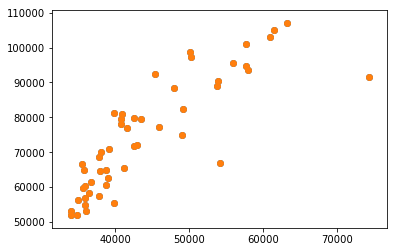

In [82]:
plt.scatter(deg2["Starting.Median.Salary"], deg2["Mid.Career.Median.Salary"])
plt.show()

In [179]:
deg.loc[16]

Undergraduate.Major                                   Drama
Starting.Median.Salary                                35900
Mid.Career.Median.Salary                              56900
Percent.change.from.Starting.to.Mid.Career.Salary      58.5
Mid.Career.10th.Percentile.Salary                     36700
Mid.Career.25th.Percentile.Salary                     41300
Mid.Career.75th.Percentile.Salary                     79100
Mid.Career.90th.Percentile.Salary                    153000
Name: 16, dtype: object

In [187]:
deg.loc[40]

Undergraduate.Major                                  Nursing
Starting.Median.Salary                                 54200
Mid.Career.Median.Salary                               67000
Percent.change.from.Starting.to.Mid.Career.Salary       23.6
Mid.Career.10th.Percentile.Salary                      47600
Mid.Career.25th.Percentile.Salary                      56400
Mid.Career.75th.Percentile.Salary                      80900
Mid.Career.90th.Percentile.Salary                      98300
Name: 40, dtype: object

In [189]:
deg.loc[43]

Undergraduate.Major                                  Physician Assistant
Starting.Median.Salary                                             74300
Mid.Career.Median.Salary                                           91700
Percent.change.from.Starting.to.Mid.Career.Salary                   23.4
Mid.Career.10th.Percentile.Salary                                  66400
Mid.Career.25th.Percentile.Salary                                  75200
Mid.Career.75th.Percentile.Salary                                 108000
Mid.Career.90th.Percentile.Salary                                 124000
Name: 43, dtype: object

In [194]:
deg

,Undergraduate.Major,Starting.Median.Salary,Mid.Career.Median.Salary,Percent.change.from.Starting.to.Mid.Career.Salary,Mid.Career.10th.Percentile.Salary,Mid.Career.25th.Percentile.Salary,Mid.Career.75th.Percentile.Salary,Mid.Career.90th.Percentile.Salary
0,Accounting,46000,77100,67.6,42200,56100,108000.0,152000
1,Aerospace Engineering,57700,101000,75.0,64300,82100,127000.0,161000
2,Agriculture,42600,71900,68.8,36300,52100,96300.0,150000
3,Anthropology,36800,61500,67.1,33800,45500,89300.0,138000
4,Architecture,41600,76800,84.6,50600,62200,97000.0,136000
5,Art History,35800,64900,81.3,28800,42200,87400.0,125000
6,Biology,38800,64800,67.0,36900,47400,94500.0,135000
7,Business Management,43000,72100,67.7,38800,51500,102000.0,147000
8,Chemical Engineering,63200,107000,69.3,71900,87300,143000.0,194000
9,Chemistry,42600,79900,87.6,45300,60700,108000.0,148000
